<a href="https://colab.research.google.com/github/bluejay-ai/DeepLearning-TSAI/blob/master/Project3-DNN/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Calling all heavenly gods before running ML algorithimns

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading MNIST data into training and testing set

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Print X_train[0] from the dataset

(60000, 28, 28)


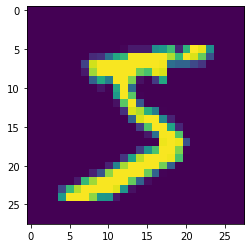

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping training and testing data set

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Normalizing the training and testing data set

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Printing first ten labels

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Converting Y into categorical varriable for ease of implementing a DNN

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

This is my model. It comprises of 4 2D Convolution layers, followed by a max-poolinng and then another 4D Convoultion layers. The GRF is 28. The activation function used is ReLu.

In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3,activation='relu'))
model.add(Convolution2D(16, 3, 3,activation='relu'))
model.add(Convolution2D(16, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3,activation='relu'))

model.add(Convolution2D(16, 3, 3,activation='relu'))
model.add(Convolution2D(16, 3, 3,activation='relu'))

model.add(Convolution2D(10, 4,4))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ip

This is summary of my model, describing # of parameters.

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 16)         

This is defining metrics for the model.

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model should be trainned onn training set, with batch size 32 and epoch 10.

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 24s 408us/step - loss: 0.2232 - acc: 0.9290
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0720 - acc: 0.9777
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0534 - acc: 0.9834
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0451 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0397 - acc: 0.9872
Epoch 6/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0345 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0311 - acc: 0.9903
Epoch 8/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0283 - acc: 0.9910
Epoch 9/10
60000/60000 [==============================] - 11s 177us/step - loss: 0

Following is the performance of my model on test set. Accuracy is 99.04%

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.0318303303540044, 0.9904]


In [0]:
y_pred = model.predict(X_test)

Following are first ten labels of test set. It shows the difference b/w prediction and actual value. The predictions are in terms of accuracy.

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[5.7879548e-11 4.4937593e-10 2.1954706e-06 3.3962642e-09 1.7549825e-09
  1.7331869e-09 8.8399713e-17 9.9999774e-01 1.2712377e-09 7.4216366e-08]
 [6.9184225e-08 1.2335329e-05 9.9998021e-01 2.3573402e-07 1.9639715e-06
  8.2927776e-10 5.2267292e-06 2.1606623e-09 5.3892862e-08 2.5738431e-10]
 [2.3604285e-12 9.9999499e-01 4.7037534e-09 1.1450096e-11 1.4268269e-06
  9.1540164e-10 2.2109972e-09 3.4796597e-06 9.1882413e-08 7.7756175e-09]
 [9.9999464e-01 3.7759745e-13 3.0754578e-07 7.1622819e-11 4.6563546e-08
  4.9022258e-08 4.3761224e-06 4.3055329e-10 1.7775312e-07 3.2592533e-07]
 [7.1404820e-11 9.8604210e-14 5.8801743e-13 1.2071238e-14 9.9999988e-01
  2.6895749e-12 1.0781719e-09 3.8844050e-11 1.6081129e-11 6.1299716e-08]
 [7.5678498e-11 9.9999642e-01 2.0333221e-08 1.8399013e-13 2.2953468e-06
  1.9151802e-10 4.0124646e-09 7.6102043e-07 4.9296722e-07 7.0541495e-10]
 [8.8756746e-10 1.4164742e-09 1.9824206e-08 5.0714549e-10 9.9491310e-01
  1.0301546e-08 2.2624595e-11 8.9565128e-06 5.0751162e-03 

Following function is showing the filters and input image.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

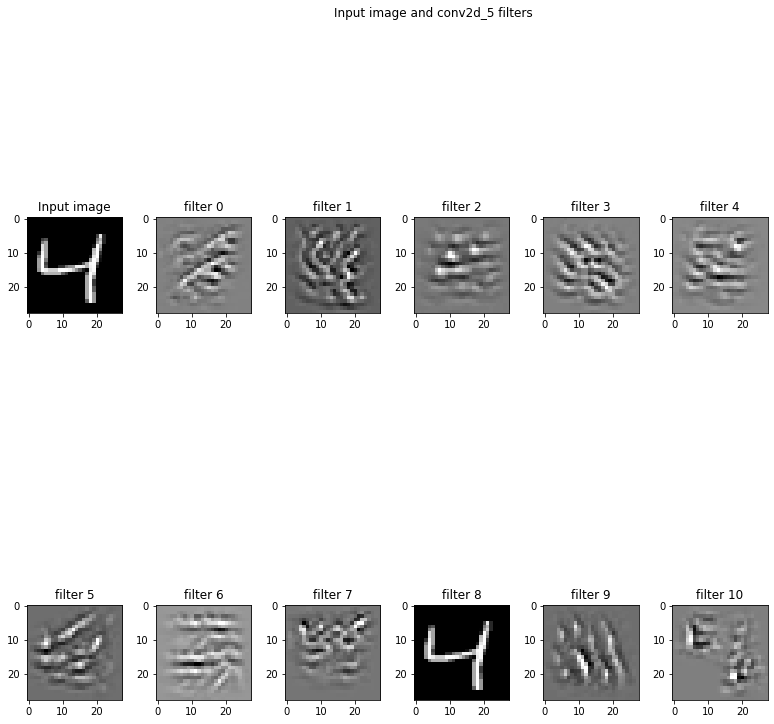

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()